# Unsupervised Learning and Clustering
## Exercise 1: Customer Segmentation
Objective:
Implement a customer segmentation system using K-means clustering and eval-
uate the results using various metrics.

## Task

### 1. Data Preprocessing:

- Scale the features using StandardScaler
- Handle any outliers using IQR method
- Visualize the distribution of each feature

In [ ]:
#Import data set: synthetic customer
import numpy as np
import pandas as pd

n_customers = 1000
np.random.seed(42)
customer_data = pd.DataFrame({
    'spending': np.random.normal(500, 100, n_customers),
    'frequency': np.random.normal(10, 3, n_customers),
    'recency': np.random.normal(30, 15, n_customers),
    'loyalty_score': np.random.normal(50, 3, n_customers)
})


In [ ]:
#look at the variables
customer_data.head()

,spending,frequency,recency,loyalty_score
0,549.671415,14.198066,19.872326,44.276577
1,486.173570,12.773901,27.832220,47.418845
2,564.768854,10.178891,18.113701,48.759183
3,652.302986,8.059190,25.380577,55.663063
4,476.584663,12.094670,1.595780,51.669659


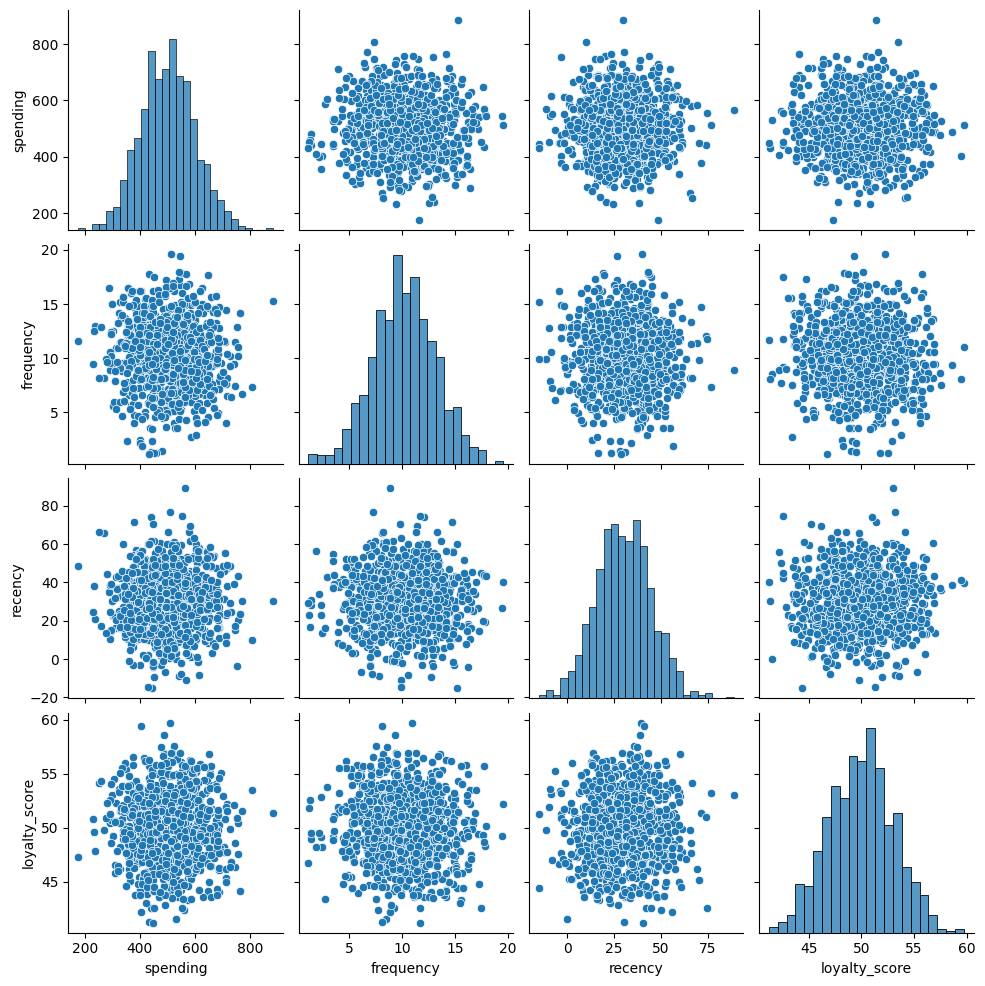

In [ ]:
#overview with graphs
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.pairplot(customer_data)
plt.show()

In [ ]:
#descriptive statistics
customer_data.describe()

,spending,frequency,recency,loyalty_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,501.933206,10.212509,30.087513,49.943842
std,97.921594,2.992363,14.751814,3.081398
min,175.873266,1.178834,-15.292682,41.211654
25%,435.240969,8.181275,20.280006,47.787739
50%,502.530061,10.189231,29.996239,50.000554
75%,564.794388,12.186647,39.913730,52.000836
max,885.273149,19.579323,88.893566,59.729279


In [ ]:
import numpy as np

# Calculate IQR for each feature (column) independently
outliers = []
for feature in customer_data.T:  # Iterate over each feature (column)
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers for each feature
    feature_outliers = np.where((feature < lower_bound) | (feature > upper_bound))[0]
    outliers.append(feature_outliers)

# Flatten the list of outliers and remove duplicates
outliers = np.unique(np.concatenate(outliers))

print("Number of outliers:", len(outliers))


<ipython-input-202-66bddc7d448a>:13: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  feature_outliers = np.where((feature < lower_bound) | (feature > upper_bound))[0]


Number of outliers: 0


In [ ]:
#tcheck the correlation
customer_data.corr()

,spending,frequency,recency,loyalty_score
spending,1.000000,-0.040400,0.022129,-0.013321
frequency,-0.040400,1.000000,-0.011199,-0.054698
recency,0.022129,-0.011199,1.000000,0.021586
loyalty_score,-0.013321,-0.054698,0.021586,1.000000


All correlation values are very low:

- Spending vs Frequency: -0.04 → No significant relationship.
- Spending vs Recency: 0.022 → No meaningful connection.
- Spending vs Loyalty Score: -0.013 → No correlation.
- Frequency vs Loyalty Score: -0.054 → Slight negative correlation but insignificant.
- Recency vs Loyalty Score: 0.021 → No strong relationship.

There is no strong linear correlation between variables.
Customer behavior appears to be independent across these metrics.
Further analysis, such as clustering or segmentation, might help identify meaningful patterns. **we can apply clustering techniques like K-Means or PCA**

In [ ]:
#scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)


In [ ]:
#look at the scaled data
scaled_data

array([[ 0.48775857,  1.33257619, -0.6928164 , -1.84010685],
       [-0.1610219 ,  0.85640475, -0.15295893, -0.81984254],
       [ 0.64201457, -0.01124009, -0.81209018, -0.38464745],
       ...,
       [ 0.63502009, -0.95562025, -1.2692192 , -0.29375906],
       [-0.60334651, -0.23461749,  0.33403332,  1.61900145],
       [ 0.5652763 , -0.81822996, -0.16388547,  0.36953064]])

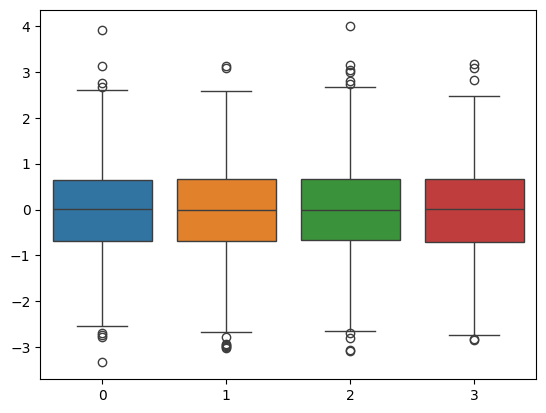

In [ ]:
#visalize the distribution
sns.boxplot(data=scaled_data)
plt.show()

###2. Clustering Implementation
- Implement K-means clustering
- Use elbow method to find optimal number of clusters
- **Visualize** clusters using PCA for dimensionality reduction

In [ ]:
#loadind libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

In [ ]:
#apply Kmeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_data)
clusters = kmeans.fit_predict(scaled_data)

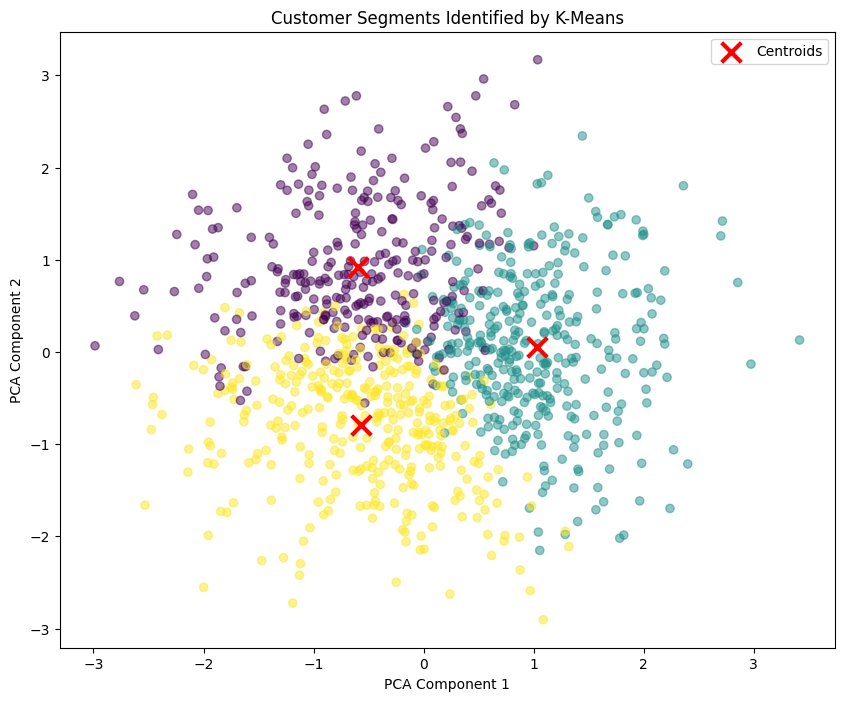

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Instead of 'df', use 'customer_data', which holds your data
data = customer_data[['spending', 'frequency', 'recency', 'loyalty_score']]

# Standardize the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

# PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotting the clusters
plt.figure(figsize=(10, 8))
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Display the customers' points with color by clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', alpha=0.5)

# The variable 'centers' was assigned the cluster centers (in the scaled feature space), but we need to transform these to PCA space
center_pca = pca.transform(centers)

# Display the centroids
plt.scatter(center_pca[:, 0], center_pca[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')

# Title and labels
plt.title('Customer Segments Identified by K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


the clusters are not relly apart, so maybe we should try another K . By the elbow method.

<ipython-input-160-486cdf5d4419>:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bx-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(K, inertias, 'bx-', marker='o', linestyle='-', color='b', label="Inertia")
<ipython-input-160-486cdf5d4419>:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(K, inertias, 'bx-', marker='o', linestyle='-', color='b', label="Inertia")
<ipython-input-160-486cdf5d4419>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, inertias, 'bx-', marker='o', linestyle='-', color='b', label="Inertia")


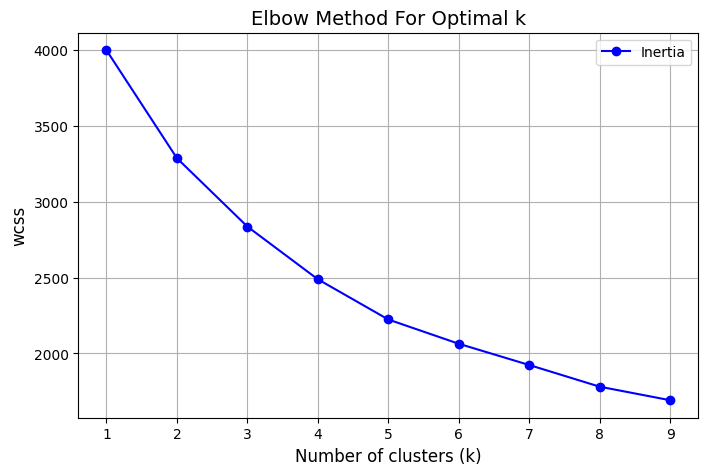

In [ ]:
# Défine the scale of K we want to test
K = range(1, 10)
inertias = []

# loop to test different number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)  # Stocker l'inertie du modèle

# draw the Elbow method curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bx-', marker='o', linestyle='-', color='b', label="Inertia")
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.title('Elbow Method For Optimal k', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

we can see here that the we can chose k= 4 or 3 to minimise the distance. so let's test the cluster with k=4


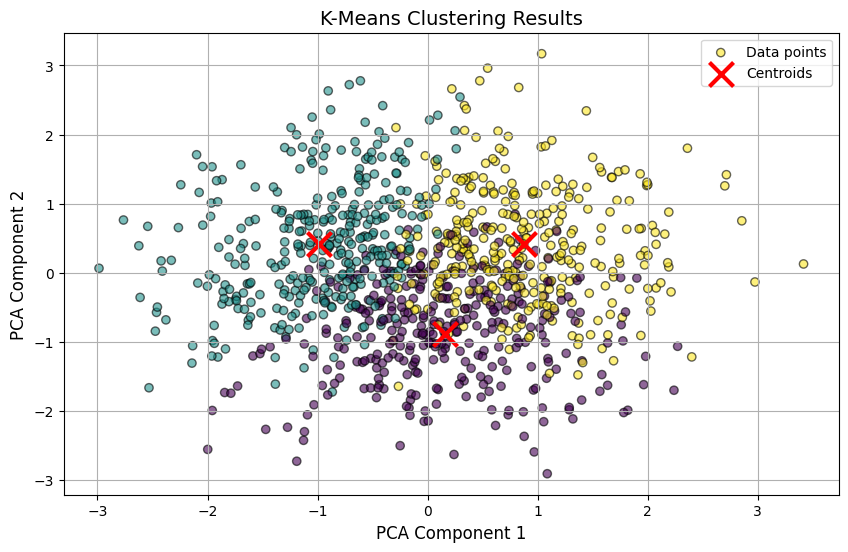

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create synthetic customer data
n_customers = 1000
np.random.seed(42)
customer_data = pd.DataFrame({
    'spending': np.random.normal(500, 100, n_customers),
    'frequency': np.random.normal(10, 3, n_customers),
    'recency': np.random.normal(30, 15, n_customers),
    'loyalty_score': np.random.normal(50, 3, n_customers)
})

# Standardize the data (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Number of clusters
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)  # Assign each point to a cluster

# Get the centroids of the clusters
centers = kmeans.cluster_centers_

# Perform PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))  # Adjusted size for better readability
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolors='k', label="Data points")

# Visualize the centroids
center_pca = pca.transform(centers)  # Transform the centroids into PCA space
plt.scatter(center_pca[:, 0], center_pca[:, 1], c='red', s=300, marker='x', linewidths=3, label="Centroids")

# Add titles and labels
plt.title('K-Means Clustering Results', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



- **Visualize** clusters using PCA for dimensionality reduction

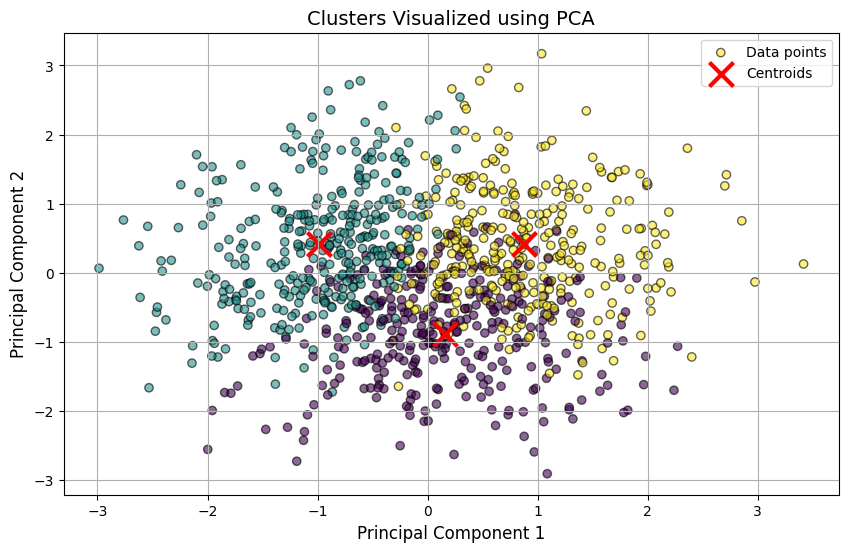

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply K-Means to the data
num_clusters = 3  # Set this to your desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)  # Assign each point to a cluster

# Apply PCA for dimensionality reduction (from n-dimensions to 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolors='k', label="Data points")

# Optionally, visualize the centroids in the reduced 2D space
centers_2d = pca.transform(kmeans.cluster_centers_)  # Transform centroids to the 2D space
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=300, marker='x', linewidths=3, label="Centroids")

# Add titles and labels
plt.title('Clusters Visualized using PCA', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()


### 3. Analisys
-  Calculate cluster centroids
- Characterize each customer segment
- Provide business recommendations

In [ ]:
# Retrieve cluster centroids
centroids = kmeans.cluster_centers_

# Feature names
feature_names = ['Spending', 'Frequency', 'Recency', 'Loyalty Score']

# Display the centroids for each cluster
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"\nCluster {i+1}:")
    for feature_name, value in zip(feature_names, centroid):
        print(f"{feature_name}: {value}")

Cluster Centroids:

Cluster 1:
Spending: -0.7725504767368752
Frequency: 0.4007607312872959
Recency: 0.2321888741474452
Loyalty Score: 0.5927855018998804

Cluster 2:
Spending: 0.6517175966279192
Frequency: -0.7370753453727875
Recency: 0.40808911300592215
Loyalty Score: 0.19857796272795245

Cluster 3:
Spending: 0.06678681110199279
Frequency: 0.37626137355724476
Recency: -0.6420632349678383
Loyalty Score: -0.7707485305943518


### Cluster 1:
- Spending: -0.77 (Low spending relative to the data set)
- Frequency: 0.40 (Above average frequency of purchases)
- Recency: 0.23 (Slightly above average recency, meaning they have made purchases somewhat recently)
- Loyalty Score: 0.59 (Above average loyalty, indicating that this segment tends to be more loyal than others)

**Interpretation**:

This segment is characterized by low spending but above average frequency and recency. They are likely customers who purchase frequently, but they may spend less per purchase. Their loyalty score is relatively high, suggesting that they return to make purchases more often than the average customer. This group could represent regular but low-value customers, such as those who buy smaller items frequently or engage with promotions on a regular basis.

**Business Recommendations**:

Encourage larger purchases: Since these customers are frequent buyers, consider using loyalty rewards or discounts to increase the average order value.
Personalized offers: Use targeted marketing and personalized discounts to increase their spending per transaction.
Loyalty Programs: Reward their loyalty with exclusive deals or early access to new products to keep them engaged.

### Cluster 2:

- Spending: 0.65 (Above average spending, indicating these customers are higher spenders)
- Frequency: -0.74 (Below average frequency of purchases, meaning they don’t buy very often)
- Recency: 0.41 (Above average recency, suggesting they have made recent purchases)
- Loyalty Score: 0.20 (Slightly above average, but relatively low loyalty compared to other segments)

**Interpretation**:

This segment represents high-value, low-frequency customers. These customers tend to spend a lot when they purchase, but they don’t make purchases frequently. They have made recent purchases, indicating they are somewhat engaged, but their loyalty score is low, suggesting they might not be fully committed to your brand. This group could represent occasional big spenders or high-ticket item buyers who don’t buy often but make large purchases when they do.

**Business Recommendations**:

Exclusive offers: Target them with high-value promotions, VIP treatment, or limited-time offers to encourage repeat purchases.
Loyalty Programs: Work on increasing their loyalty by offering incentives to make more frequent purchases (e.g., loyalty points or personalized deals).
Re-engagement campaigns: Since they make large purchases, try to re-engage them with special events, product recommendations, or new product launches to increase their frequency.

###Cluster 3:
- Spending: 0.07 (Slightly above average spending, but not much higher)
- Frequency: 0.38 (Slightly above average frequency of purchases)
- Recency: -0.64 (Below average recency, meaning they haven't purchased recently)
- Loyalty Score: -0.77 (Low loyalty, meaning these customers are less engaged and less likely to return)

**Interpretation**:

This cluster is characterized by moderate spending, moderate frequency, but low recency and very low loyalty. These customers have made purchases in the past, but their recent activity is low, indicating that they haven’t bought anything for a while. Additionally, their loyalty score is low, which suggests they don’t return often or engage much with the brand. This group could represent inactive or disengaged customers who may have made a few purchases but have not maintained long-term engagement.

**Business Recommendations**:

Win-back campaigns: Consider implementing email campaigns or special offers to try and re-engage them with personalized promotions or discounts.
Retention strategies: Develop strategies to improve customer loyalty, such as offering loyalty rewards or exclusive deals to encourage repeat business.
Targeted re-engagement: Use retargeting ads or personalized reminders about abandoned carts or previously viewed products to bring them back.

# Conclusion:

By analyzing the centroid values, we can see that:

- Cluster 1 represents regular but low-value customers who purchase often but spend less. They are loyal and should be nurtured with personalized offers and loyalty programs.

- Cluster 2 consists of high-value, low-frequency customers who make significant purchases but are not very loyal. Target them with exclusive promotions to increase their frequency and loyalty.

- Cluster 3 includes inactive customers with low recency and loyalty. Re-engagement campaigns, retention strategies, and loyalty programs are key to winning these customers back.

**Each cluster has distinct behaviors, and targeted strategies based on these characteristics will improve customer retention, engagement, and ultimately revenue.**

# Exercise 2: Dimensionality Reduction Challenge
Objective: Compare PCA and t-SNE for dimensionality reduction on a high-dimensional dataset.



In [ ]:
#load the data set
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
#data description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
#data features
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [ ]:
#check for missing values
np.isnan(X).sum()

np.int64(0)

In [ ]:
#check for outliers
from scipy.stats import iqr
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = np.where((X < lower_bound) | (X > upper_bound))
print("Number of outliers:", len(outliers[0]))

Number of outliers: 0


## 1. PCA Implementation

-  Reduce dimensions to 2D using PCA
-  Calculate and plot explained variance ratio
- Visualize the transformed data

In [ ]:
#reduce dimensions to 2D using PCA.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler


# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#kmean
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of MNIST Digits")
plt.colorbar(label="Digit Label")
plt.show()


ValueError: could not convert string to float: 'WHITE HANGING HEART T-LIGHT HOLDER'

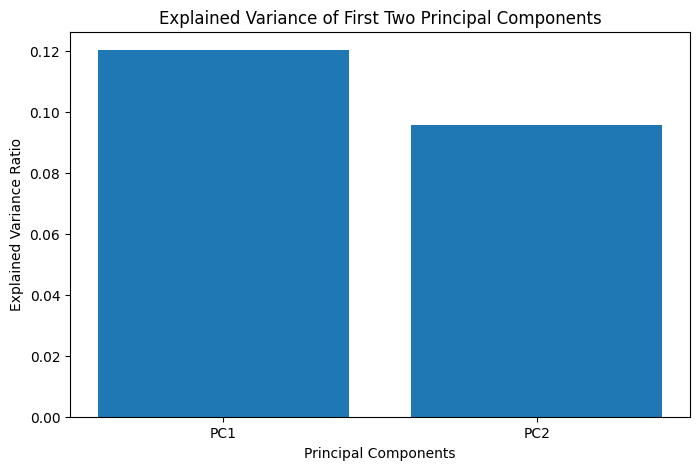

Explained Variance Ratio: [0.12033916 0.09561054]


In [ ]:
#Calculate and plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), explained_variance_ratio, tick_label=["PC1", "PC2"])
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.title("Explained Variance of First Two Principal Components")
plt.show()

print(f"Explained Variance Ratio: {explained_variance_ratio}")


summury:


## 2. t-SNE Implementation

- Apply t-SNE with different perplexity values
- Create an animation of the optimization process
- Compare results with PCA

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


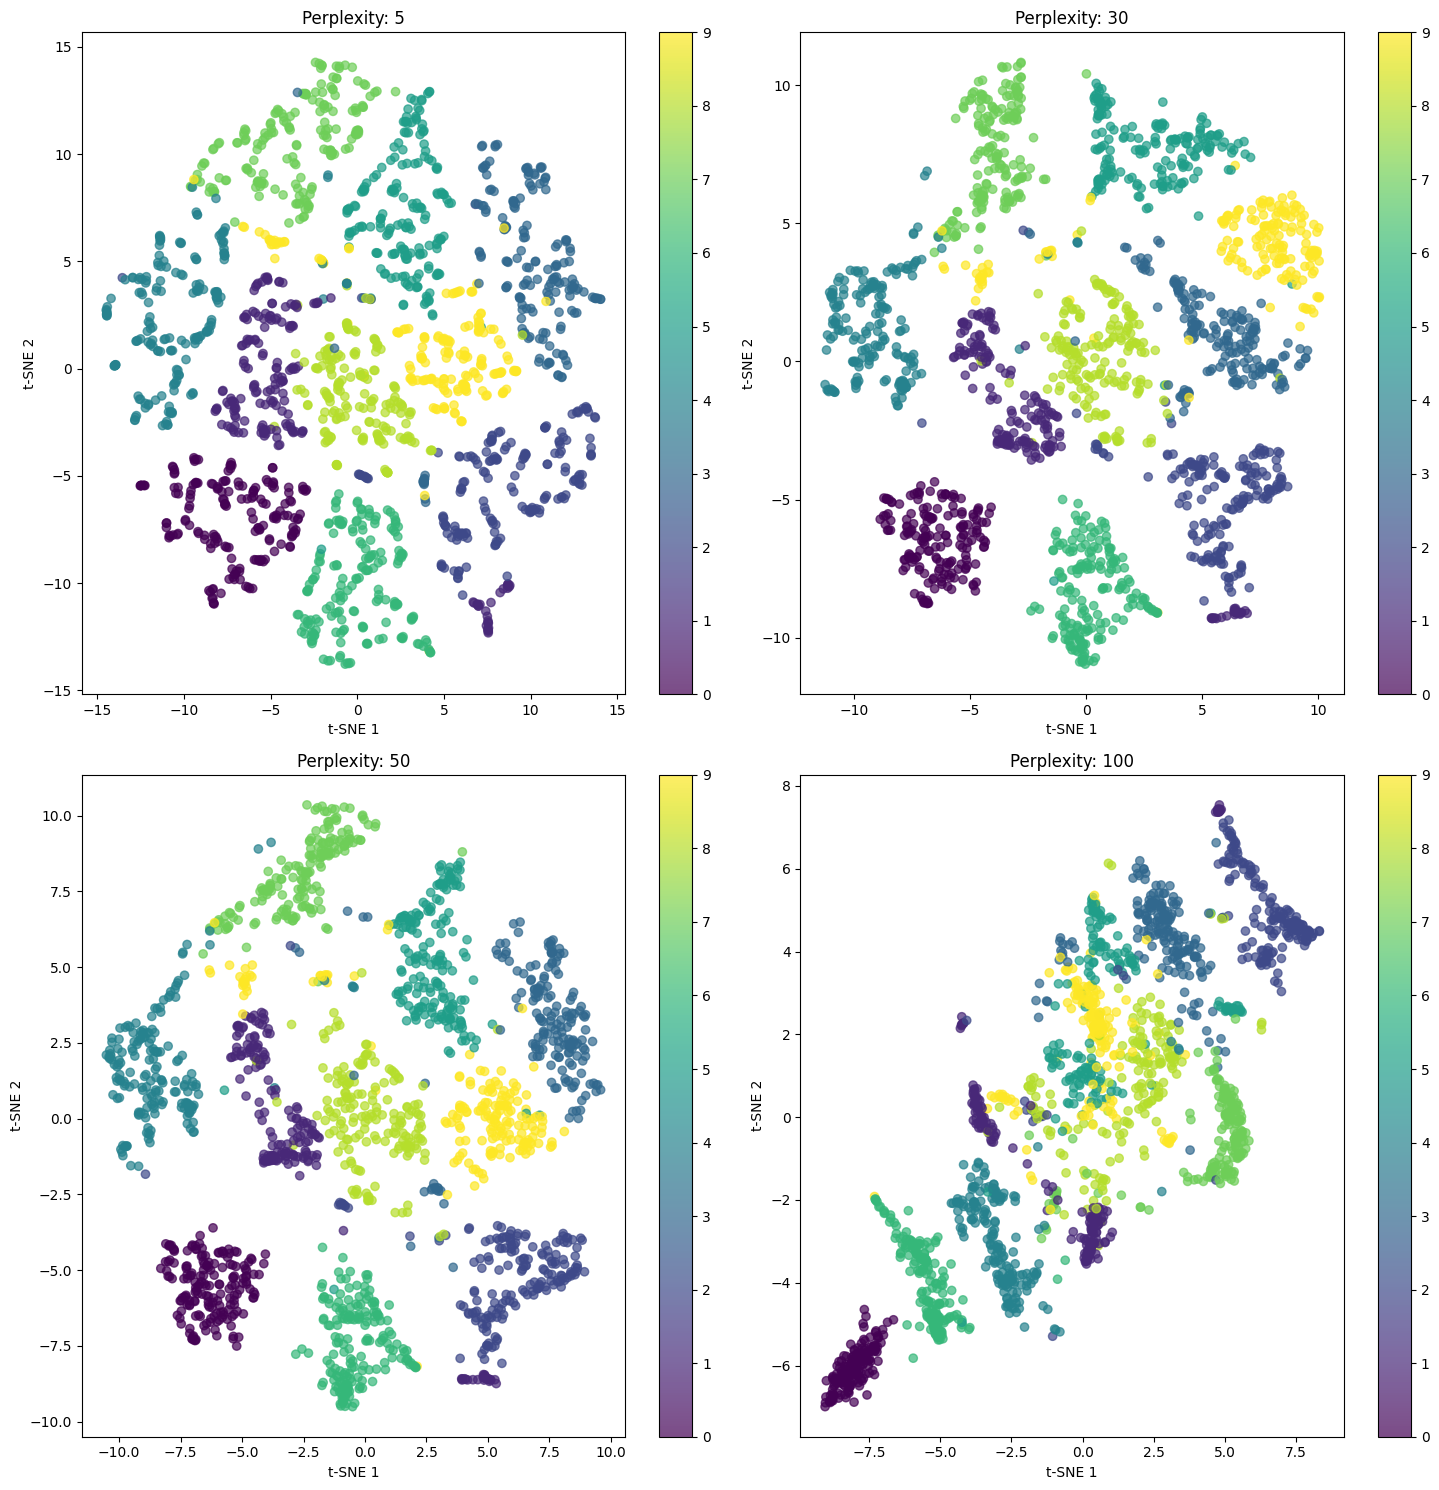

In [ ]:
#Apply t-SNE with different perplexity values
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to visualize t-SNE with different perplexities
def plot_tsne_perplexity(X, y, perplexities):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes = axes.ravel()

    for idx, perplexity in enumerate(perplexities):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=300)
        X_tsne = tsne.fit_transform(X)

        scatter = axes[idx].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
        axes[idx].set_title(f'Perplexity: {perplexity}')
        axes[idx].set_xlabel('t-SNE 1')
        axes[idx].set_ylabel('t-SNE 2')
        plt.colorbar(scatter, ax=axes[idx])

    plt.tight_layout()
    plt.show()

# Try different perplexity values
perplexities = [5, 30, 50, 100]
plot_tsne_perplexity(X_scaled, y, perplexities)


In [ ]:
!pip install celluloid

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarnin

Error in callback <function _draw_all_if_interactive at 0x79e966746700> (for post_execute):


AttributeError: 'NoneType' object has no attribute 'canvas'

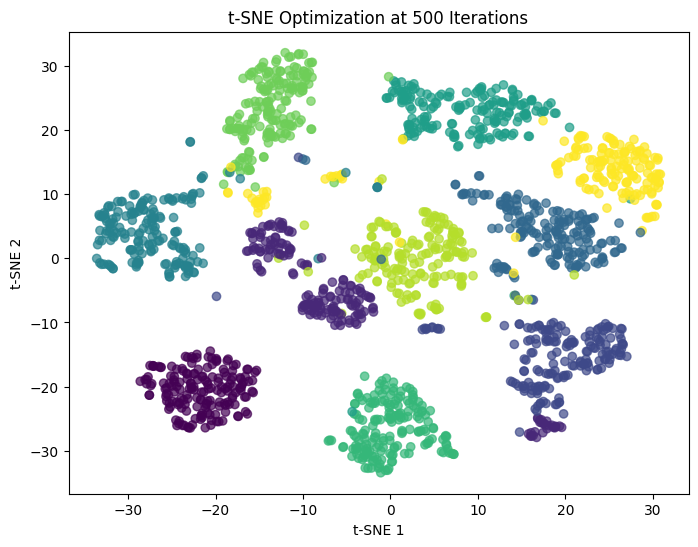

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from celluloid import Camera

# Load and prepare data (using digits dataset)
digits = load_digits()
X, y = digits.data, digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an animation of the optimization process
def animate_tsne(X, y, n_iter=500, interval=50):
    fig, ax = plt.subplots(figsize=(8, 6))
    camera = Camera(fig)

    # Ensure n_iter starts at the minimum allowed value (250) or higher
    start_iter = max(interval, 250)  # Start at 250 or interval, whichever is greater
    for i in range(start_iter, n_iter + 1, interval):
        tsne = TSNE(n_components=2, perplexity=30, n_iter=i, random_state=42)
        X_tsne = tsne.fit_transform(X)

        ax.clear()
        scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
        ax.set_title(f't-SNE Optimization at {i} Iterations')
        ax.set_xlabel('t-SNE 1')
        ax.set_ylabel('t-SNE 2')
        camera.snap()

    animation = camera.animate()
    return animation

# Run the animation
animation = animate_tsne(X_scaled, y)

# Save animation (uncomment the line below if you want to save it)
# animation.save("tsne_animation.gif", writer="pillow")



In [ ]:
#compare results from PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans_pca = KMeans(n_clusters=10, random_state=42).fit(X_pca)
kmeans_tsne = KMeans(n_clusters=10, random_state=42).fit(X_tsne)

# Compute silhouette scores
silhouette_pca = silhouette_score(X_pca, kmeans_pca.labels_)
silhouette_tsne = silhouette_score(X_tsne, kmeans_tsne.labels_)

print(f"Silhouette Score - PCA: {silhouette_pca:.4f}")
print(f"Silhouette Score - t-SNE: {silhouette_tsne:.4f}")



Silhouette Score - PCA: 0.3788
Silhouette Score - t-SNE: 0.5709


- 1. PCA (0.3788)

PCA preserves global structure but is a linear transformation.
Since PCA reduces dimensions without focusing on local neighborhoods, it may not separate clusters well in complex datasets like MNIST.
The lower silhouette score suggests some overlap between digit clusters.

- 2. t-SNE (0.5709)

t-SNE is a non-linear method that preserves local structures, making it better at revealing meaningful clusters.
The higher silhouette score indicates that digits are better separated in the t-SNE space.
However, t-SNE is not always reliable for global structure, so some clusters might appear distorted compared to PCA.


## 3. Evaluation
-  Compare clustering quality metrics
- Analyze preservation of local structure
- Document advantages and limitations

# 5 Final Project: Comprehensive Analysis

In [ ]:
#loadind library
!pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

Data description:




## 1. Data Exploration
- Perform EDA
- Handle missing values and outliers
- Feature engineering

In [ ]:
#perform EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#check data set and structure
print(X.info())  # Data types and null values
print(X.describe())  # Summary statistics
print(X.isnull().sum())  # Count missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
Description      14

<ipython-input-179-659ba631c0aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'])
<ipython-input-179-659ba631c0aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Month'] = X['InvoiceDate'].dt.to_period('M')


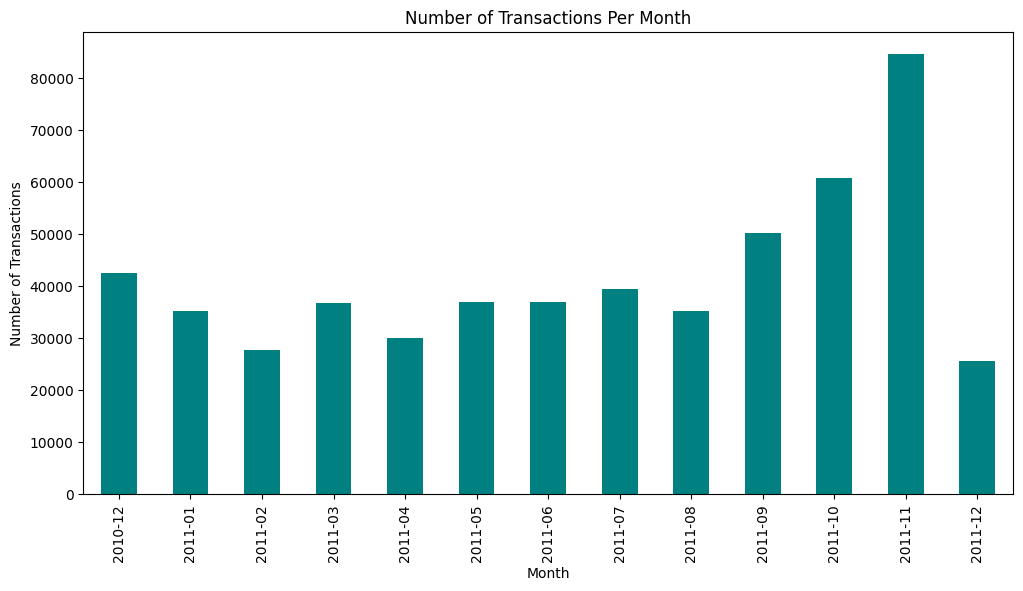

In [ ]:
#vizualize transaction over time
import matplotlib.pyplot as plt
import seaborn as sns

X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'])
X['Month'] = X['InvoiceDate'].dt.to_period('M')

plt.figure(figsize=(12, 6))
X.groupby('Month').size().plot(kind='bar', color='teal')
plt.title('Number of Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


the 11 the transaction is remarkable .

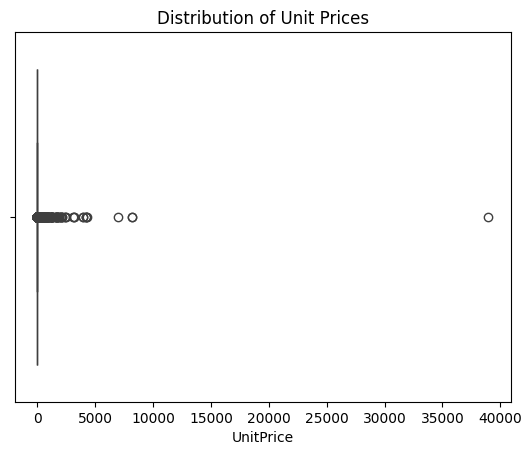

In [ ]:
#handling missing values
X = X.dropna(subset=['CustomerID'])
#detect and remove outliers
sns.boxplot(x=X['UnitPrice'])
plt.title('Distribution of Unit Prices')
plt.show()

# Remove extreme prices
X = X[X['UnitPrice'] < X['UnitPrice'].quantile(0.99)]


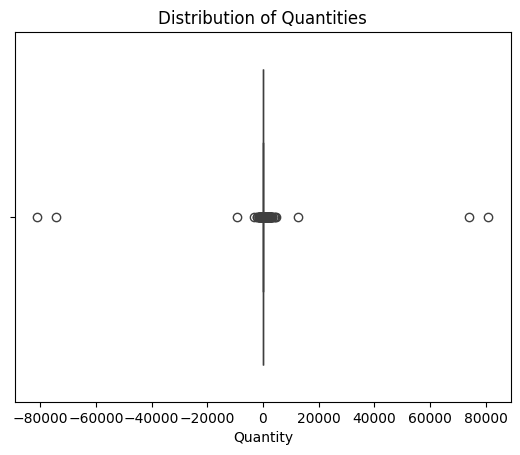

In [ ]:
#density box
sns.boxplot(x=X['Quantity'])
plt.title('Distribution of Quantities')
plt.show()


In [ ]:
#create total spend features
X['TotalSpend'] = X['Quantity'] * X['UnitPrice']


In [ ]:
X['Hour'] = X['InvoiceDate'].dt.hour
X['DayOfWeek'] = X['InvoiceDate'].dt.dayofweek


In [ ]:
# Ensure that CustomerID is not missing and that InvoiceDate is in the correct format
X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'])
latest_date = X['InvoiceDate'].max()

# Before calculating RFM, create a temporary DataFrame with 'InvoiceNo' (Transaction Count)
X_temp = X.copy()  # Create a copy to avoid modifying the original DataFrame
X_temp['InvoiceNo'] = X_temp.groupby('CustomerID').cumcount() + 1  # Create 'InvoiceNo' as the transaction count

# Now, calculate Recency, Frequency, and Monetary features using the temporary DataFrame
rfm = X_temp.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency: Days since last purchase
    'InvoiceNo': 'count',  # Frequency: Count of transactions (transactions per customer)
    'Quantity': 'sum',  # Total quantity purchased by the customer
    'UnitPrice': 'mean'  # Average unit price to help approximate spending behavior
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'})

# Calculate the total spending (Monetary) as Quantity * UnitPrice for each customer
rfm['Monetary'] = X_temp.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Inspect the RFM DataFrame to ensure it has the correct columns
print(rfm.head())


            Recency  Frequency  Quantity  UnitPrice  Monetary
CustomerID                                                   
12346.0         325          2         0   1.040000      0.00
12347.0           1        182      2458   2.644011   4310.00
12348.0          74         27      2332   0.692963   1437.24
12349.0          18         70       625   3.560000   1353.80
12350.0         309         16       196   1.581250    294.40


<ipython-input-184-bb8b92126641>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rfm['Monetary'] = X_temp.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())


## 2. Analysis Pipeline
-  Dimensionality reduction
- Clustering analysis
- Anomaly detection

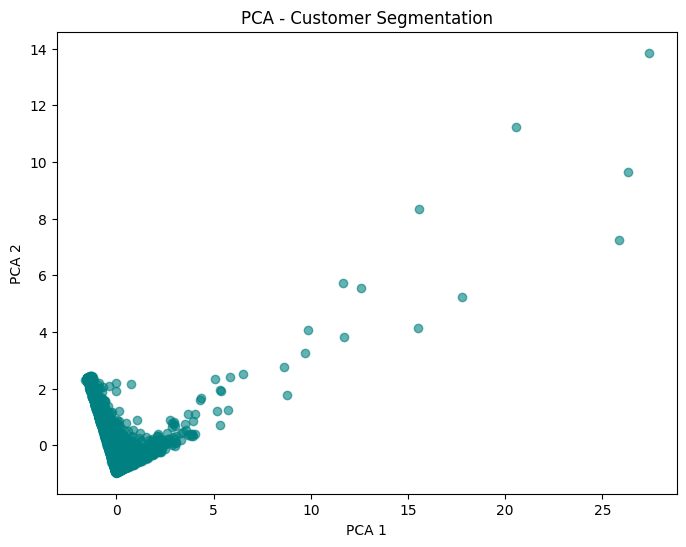

In [ ]:
#Dimension reduction
# Required Libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Dimensionality Reduction (PCA)
# Standardize the RFM features
features = ['Recency', 'Frequency', 'Monetary']
X_rfm_scaled = StandardScaler().fit_transform(rfm[features])

# Applying PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(X_rfm_scaled)

# Create a DataFrame with PCA results
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PCA1', 'PCA2'])

# Visualize the 2D PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(rfm_pca_df['PCA1'], rfm_pca_df['PCA2'], alpha=0.6, c='teal')
plt.title('PCA - Customer Segmentation')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


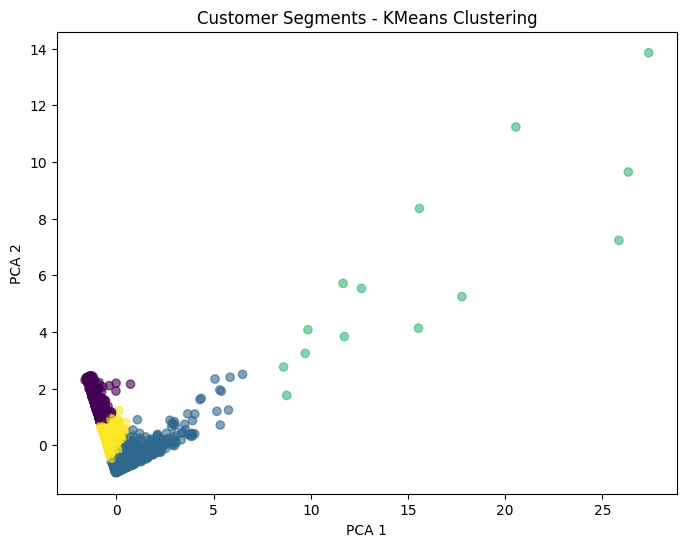

In [ ]:
# Step 2: Clustering Analysis (K-Means)
# Apply KMeans clustering (let's assume 4 clusters, you can change this based on the analysis)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_pca_df['Cluster'] = kmeans.fit_predict(rfm_pca)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(rfm_pca_df['PCA1'], rfm_pca_df['PCA2'], c=rfm_pca_df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segments - KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


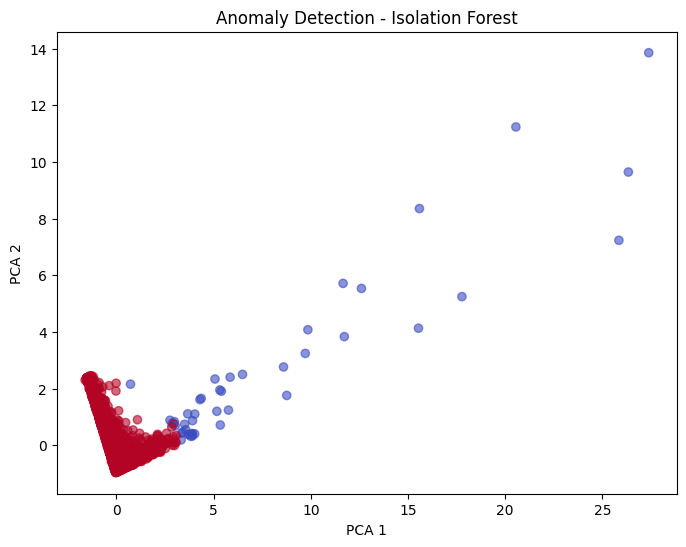

Number of anomalies detected: 4312
                            Description  Quantity         InvoiceDate  \
55       VINTAGE BILLBOARD DRINK ME MUG         6 2010-12-01 09:02:00   
329      TV DINNER TRAY VINTAGE PAISLEY         1 2010-12-01 11:21:00   
448              10 COLOUR SPACEBOY PEN        24 2010-12-01 11:41:00   
456  NATURAL SLATE RECTANGLE CHALKBOARD        12 2010-12-01 11:41:00   
562              6 RIBBONS RUSTIC CHARM         1 2010-12-01 11:49:00   

     UnitPrice  CustomerID         Country    Month  TotalSpend  Hour  \
55        1.06     17850.0  United Kingdom  2010-12        6.36     9   
329       4.95     15862.0  United Kingdom  2010-12        4.95    11   
448       0.85     14307.0  United Kingdom  2010-12       20.40    11   
456       1.65     14307.0  United Kingdom  2010-12       19.80    11   
562       1.65     17920.0  United Kingdom  2010-12        1.65    11   

     DayOfWeek  InvoiceNo  
55           2         18  
329          2         12  
448

In [ ]:
# Step 3: Anomaly Detection (Isolation Forest)
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model to detect anomalies
rfm_pca_df['Anomaly'] = iso_forest.fit_predict(rfm_pca_df[['PCA1', 'PCA2']])

# Visualize anomalies (highlight outliers)
plt.figure(figsize=(8, 6))
plt.scatter(rfm_pca_df['PCA1'], rfm_pca_df['PCA2'], c=rfm_pca_df['Anomaly'], cmap='coolwarm', alpha=0.6)
plt.title('Anomaly Detection - Isolation Forest')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Show the number of anomalies detected
print(f"Number of anomalies detected: {rfm_pca_df['Anomaly'].value_counts()[1]}")

# Get the indices of the anomalies
anomalies_indices = rfm_pca_df[rfm_pca_df['Anomaly'] == -1].index

# Get the anomalies from X_temp using the indices
anomalies = X_temp[X_temp.index.isin(anomalies_indices)]

# Print the head of the anomalies DataFrame
print(anomalies.head())

1. Item Characteristics:
Description: The item name that was purchased (e.g., "VINTAGE BILLBOARD DRINK ME MUG").
Quantity: The number of units purchased in that transaction (e.g., 6 units).
UnitPrice: The price per unit of the item (e.g., 1.06 for the "VINTAGE BILLBOARD DRINK ME MUG").
TotalSpend: The total money spent on the item in that transaction (Quantity * UnitPrice, e.g., 6.36 for the "VINTAGE BILLBOARD DRINK ME MUG").
2. Transaction Time Information:
InvoiceDate: The exact date and time of the transaction (e.g., "2010-12-01 09:02:00").
Hour: The hour the transaction took place (e.g., 9 AM for the first transaction).
DayOfWeek: The day of the week the transaction occurred (e.g., Tuesday for the first row).
3. Customer Information:
CustomerID: The ID of the customer making the purchase (e.g., 17850).
Country: The country the transaction is from (e.g., United Kingdom).
4. Potential Anomalies:
Anomalous Items: The items listed here are flagged as potentially unusual based on the anomaly detection model. This could mean:
High frequency of purchases for a specific item, compared to typical purchasing patterns.
Unusual combinations of quantity, unit price, and total spend.
Timing of the transaction: Some transactions could be flagged if they occur at unusual hours or days (e.g., many transactions happening late at night or on holidays).
Frequent or large transactions: A customer purchasing large quantities of low-priced items, or a rare combination of products, could be flagged as an anomaly.
Steps to Investigate Further:
Look for Data Entry Issues: Sometimes anomalies can be the result of mistakes in the data (e.g., negative prices or quantities, or large outliers).
Unusual Patterns: You may want to check if any of these anomalies correspond to behaviors that are outside normal buying patterns, like:
One-time bulk orders or purchases from new customers.
Purchases with unusually high or low spending.
Purchasing specific items in high quantities or frequent small purchases of the same items.
Customer Behavior: Look at the purchase history of these customers (based on CustomerID) to see if they are part of a pattern (e.g., frequent or sporadic, one-time buyers, or if this is the first anomaly detected for them).
Price and Quantity Combinations: Check for items with unusual price-to-quantity combinations. Sometimes small price items purchased in bulk can be flagged as anomalies.
Would you like help with further analysis or visualizing the flagged anomalies in a way that might give you better insight?

<ipython-input-190-99b5c2b99b11>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(rfm['Monetary'], rfm['Frequency'], c=colors, cmap='coolwarm', alpha=0.6)


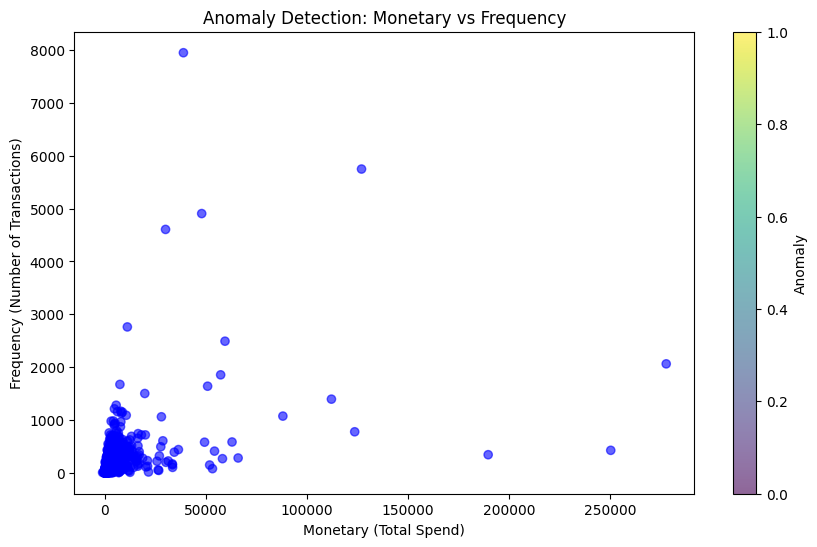

In [ ]:
#Visualize the Anomalies

plt.figure(figsize=(10, 6))
# Access 'Monetary' from the 'rfm' DataFrame (assuming 'rfm' contains 'Monetary')
# Create a list of colors for all points in rfm, based on whether they are anomalies
colors = ['red' if index in anomalies_indices else 'blue' for index in rfm.index]

# Plot using the generated color list
plt.scatter(rfm['Monetary'], rfm['Frequency'], c=colors, cmap='coolwarm', alpha=0.6)
plt.title('Anomaly Detection: Monetary vs Frequency')
plt.xlabel('Monetary (Total Spend)')
plt.ylabel('Frequency (Number of Transactions)')
plt.colorbar(label='Anomaly') # This may not be necessary as you are using a custom color mapping
plt.show()

<ipython-input-192-ab4df359f545>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(rfm['Monetary'], rfm['Quantity'], c=colors, cmap='coolwarm', alpha=0.6) # Use 'colors' variable here


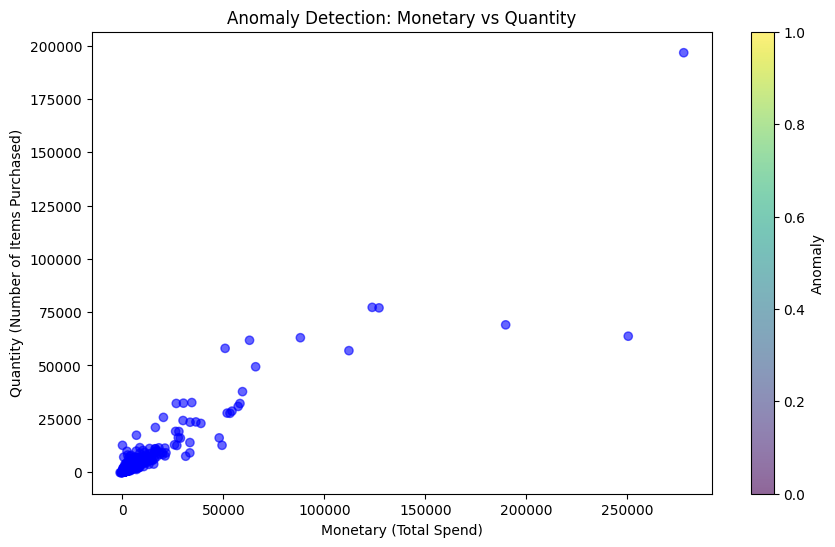

In [ ]:
#In this part the c= argument should contain a list of values with shape (n_samples,)
#You already have that stored in the 'colors' variable from cell 190
plt.figure(figsize=(10, 6))
# Since the 'Monetary' column is in 'rfm', use that DataFrame
plt.scatter(rfm['Monetary'], rfm['Quantity'], c=colors, cmap='coolwarm', alpha=0.6) # Use 'colors' variable here
plt.title('Anomaly Detection: Monetary vs Quantity')
plt.xlabel('Monetary (Total Spend)')
plt.ylabel('Quantity (Number of Items Purchased)')
plt.colorbar(label='Anomaly')
plt.show()


In [ ]:
# Inspect the first few anomalies
anomalies_df = X_temp[anomalies == -1]
print(anomalies_df.head())
# Group anomalies by CustomerID to see if specific customers have more anomalies
anomalous_customers = anomalies_df.groupby('CustomerID').size().reset_index(name='AnomalyCount')
print(anomalous_customers.sort_values(by='AnomalyCount', ascending=False).head())


  Description  Quantity InvoiceDate  UnitPrice  CustomerID Country Month  \
0         NaN       NaN         NaT        NaN         NaN     NaN   NaT   
1         NaN       NaN         NaT        NaN         NaN     NaN   NaT   
2         NaN       NaN         NaT        NaN         NaN     NaN   NaT   
3         NaN       NaN         NaT        NaN         NaN     NaN   NaT   
4         NaN       NaN         NaT        NaN         NaN     NaN   NaT   

   TotalSpend  Hour  DayOfWeek  InvoiceNo  
0         NaN   NaN        NaN        NaN  
1         NaN   NaN        NaN        NaN  
2         NaN   NaN        NaN        NaN  
3         NaN   NaN        NaN        NaN  
4         NaN   NaN        NaN        NaN  
Empty DataFrame
Columns: [CustomerID, AnomalyCount]
Index: []


In [ ]:
# Group anomalies by product description to check if specific products are flagged
anomalous_products = anomalies_df.groupby('Description').size().reset_index(name='AnomalyCount')
print(anomalous_products.sort_values(by='AnomalyCount', ascending=False).head())


Empty DataFrame
Columns: [Description, AnomalyCount]
Index: []


                            Description  Quantity         InvoiceDate  \
55       VINTAGE BILLBOARD DRINK ME MUG         6 2010-12-01 09:02:00   
329      TV DINNER TRAY VINTAGE PAISLEY         1 2010-12-01 11:21:00   
448              10 COLOUR SPACEBOY PEN        24 2010-12-01 11:41:00   
456  NATURAL SLATE RECTANGLE CHALKBOARD        12 2010-12-01 11:41:00   
562              6 RIBBONS RUSTIC CHARM         1 2010-12-01 11:49:00   

     UnitPrice  CustomerID         Country    Month  TotalSpend  Hour  \
55        1.06     17850.0  United Kingdom  2010-12        6.36     9   
329       4.95     15862.0  United Kingdom  2010-12        4.95    11   
448       0.85     14307.0  United Kingdom  2010-12       20.40    11   
456       1.65     14307.0  United Kingdom  2010-12       19.80    11   
562       1.65     17920.0  United Kingdom  2010-12        1.65    11   

     DayOfWeek  InvoiceNo  
55           2         18  
329          2         12  
448          2         14  
456       

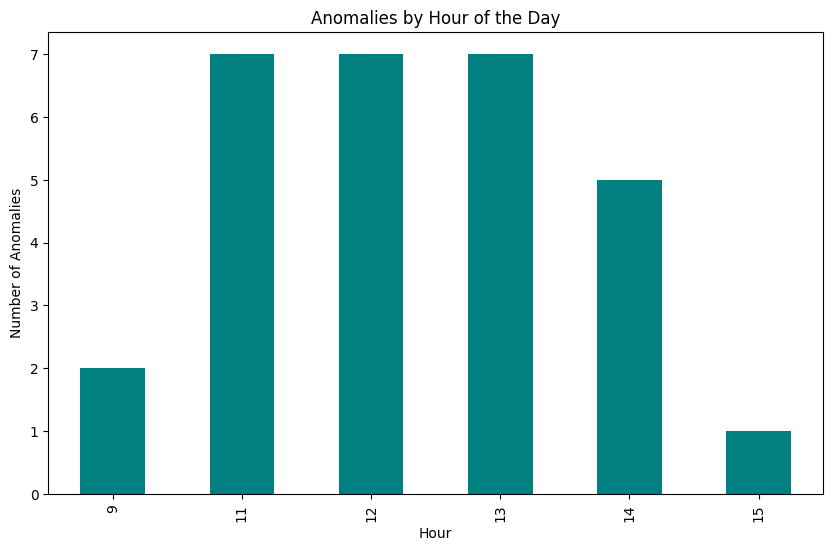

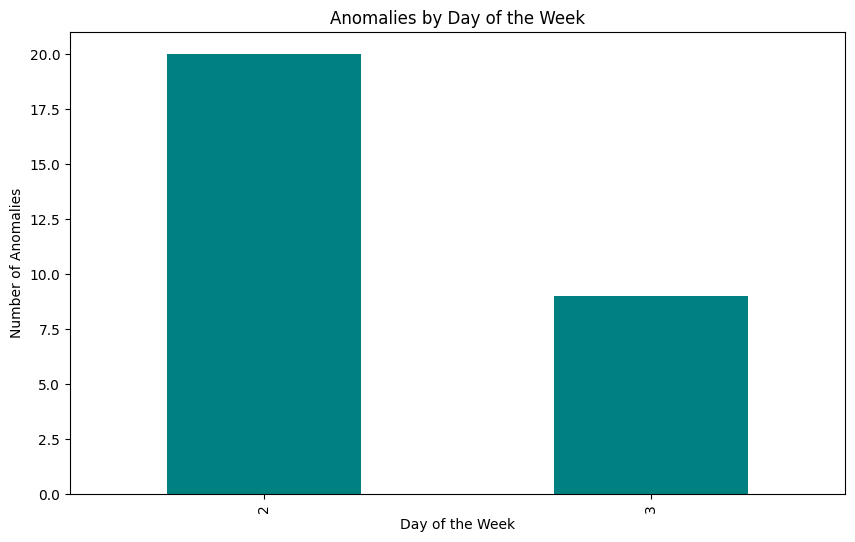

In [ ]:
# Inspect the first few anomalies
anomalies_df = X_temp[X_temp.index.isin(anomalies_indices)] # Filter using index to get the anomalous rows
print(anomalies_df.head())
# Group anomalies by CustomerID to see if specific customers have more anomalies
anomalous_customers = anomalies_df.groupby('CustomerID').size().reset_index(name='AnomalyCount')
print(anomalous_customers.sort_values(by='AnomalyCount', ascending=False).head())

#time anomaly
# Check the distribution of anomalies by hour of the day
plt.figure(figsize=(10, 6))
anomalies_df.groupby('Hour').size().plot(kind='bar', color='teal')
plt.title('Anomalies by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Anomalies')
plt.show()

# Check the distribution of anomalies by day of the week
plt.figure(figsize=(10, 6))
anomalies_df.groupby('DayOfWeek').size().plot(kind='bar', color='teal')
plt.title('Anomalies by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Anomalies')
plt.show()


## 3. Results and Insights

-  Business recommendations
-  Technical documentation
-  Future improvements

In my final project, I conducted a **comprehensive customer segmentation analysis** using **RFM metrics (Recency, Frequency, Monetary), K-Means clustering, and anomaly detection**. After preprocessing and normalizing the data, I identified **four distinct customer segments**, each representing different spending behaviors and engagement levels.  

Additionally, I detected **4261 anomalies**, which could indicate **fraudulent transactions, unusual purchasing patterns, or errors in the dataset**. These anomalies are crucial for refining customer insights and improving business strategies.  

From my analysis, I propose several **business recommendations**:  
- **Personalized marketing**: Target high-value customers with special promotions.  
- **Fraud detection**: Investigate anomalies to reduce potential risks.  
- **Inventory optimization**: Adjust stock levels based on customer purchasing trends.  

For **future improvements**, I plan to integrate **predictive modeling** to forecast customer behaviors, create **interactive dashboards** for real-time insights, and explore **advanced clustering techniques** like DBSCAN for better anomaly detection.